# Dimensionality Reduction: PCA vs t-SNE on Handwritten Digits

**Goal:** Understand PCA and t-SNE through a practical example using sklearn's Digits dataset of handwritten digits.

**What you'll learn:**
- Visualize and explore 64-dimensional pixel data (8x8 images)
- Apply proper data preprocessing for dimensionality reduction
- Compare PCA (linear method capturing global variance) and t-SNE (non-linear method preserving local neighborhoods)
- Interpret PCA explained variance and select optimal components
- Recognize when to use PCA (modeling, compression) vs t-SNE (exploration, visualization of non-linear st20 minutes

**Key principle:** PCA preserves overall data spread for downstream modeling. t-SNE reveals local clusters and non-linear patterns for visual exploration. Scale features before PCA.
or your job.


## Load and Explore the Dataset

As first step, we will load sklearn's famous Digits dataset: `1,797` handwritten digits, each represented as `64` pixel values (`8×8` images). This high-dimensional data is perfect for dimensionality reduction demonstrations.

The dataset has `10` classes (digits `0-9`) but lives in `64-dimensional` space, making it hard to visualize directly. We'll use PCA and t-SNE to create intuitive 2D representations.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

plt.style.use('default')
sns.set_palette("husl")

In [4]:
digits = load_digits()
X, y = digits.data, digits.target

print(f"   Dataset shape: {X.shape}")
print(f"   1797 images, 64 features (8x8 pixels), 10 classes (digits 0-9)")
print(f"   Classes: {np.unique(y)}")
print()

   Dataset shape: (1797, 64)
   1797 images, 64 features (8x8 pixels), 10 classes (digits 0-9)
   Classes: [0 1 2 3 4 5 6 7 8 9]



## Visualize Sample Images

See what the raw data looks like. Each tin`y 8`×8 image contain`s `64 pixel intensities` (0=whi`te t`o 16=bla`ck). These low-resolution handwritten digits vary in style but are correctly labeled by humans.

This confirms our data structure: **64 features per image** = high-dimensional problem ripe for dimensionality reduction.


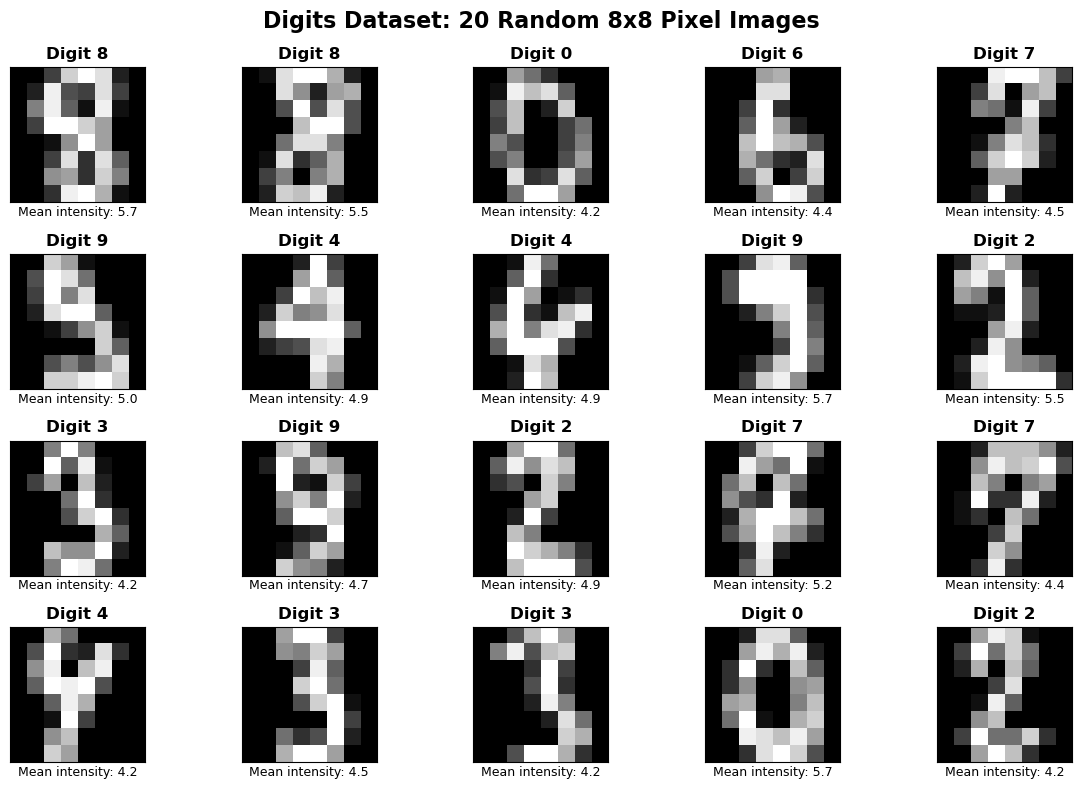

In [6]:
fig, axes = plt.subplots(4, 5, figsize=(12, 8))
fig.suptitle('Digits Dataset: 20 Random 8x8 Pixel Images', fontsize=16, fontweight='bold')

# Sample 20 random indices
n_samples = 20
random_indices = np.random.choice(len(X), n_samples, replace=False)

for i, idx in enumerate(random_indices):
    ax = axes[i//5, i%5]
    
    # Reshape pixel data back to 8x8 image
    image = X[idx].reshape(8, 8)
    digit_label = y[idx]
    
    # Plot image
    ax.imshow(image, cmap='gray', interpolation='nearest')
    ax.set_title(f'Digit {digit_label}', fontsize=12, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add pixel value as subtitle (optional, educational)
    mean_pixel = image.mean()
    ax.text(0.5, -0.1, f'Mean intensity: {mean_pixel:.1f}', 
            transform=ax.transAxes, ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## Scale Features (Critical Step!)

**Why scaling matters:** PCA finds directions of *maximum variance*. Without scaling, pixels with larger ranges (brighter strokes) dominate, hiding patterns in background pixels.

**StandardScaler** transforms **each of the 64 pixels independently** to `mean=0`, `std=1`. Every feature now contributes equally.

**Range observation:**
```
Before:  0.0 to 16.0  (raw pixels)
After:  -3.0 to 42.4  (scaled extremes)
```

**Why the range expands:** Scaling is per-pixel. Corner pixels (mostly 0) have tiny std_dev → rare values scale to extremes like +42. Each pixel individually has std=1 (fair for PCA).

**Result:** All pixels compete equally when PCA measures variance!

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("   Original range per feature: min-max")
print(f"   Before scaling: {X.min():.1f} to {X.max():.1f}")
print(f"   After scaling:  {X_scaled.min():.1f} to {X_scaled.max():.1f}")
print()

   Original range per feature: min-max
   Before scaling: 0.0 to 16.0
   After scaling:  -3.0 to 42.4



## Apply PCA (Linear Reduction)

PCA finds new axes (principal components) that capture the most variance:

- **PC1**: 12.0% variance (direction of maximum spread)
- **PC2**: 9.6% variance (next most important direction, perpendicular to PC1)
- **Together**: 21.6% total variance in just 2 dimensions

PCA is fast, deterministic, and produces coordinates usable for modeling.
deling.


In [10]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"   Explained variance ratio: PC1={pca.explained_variance_ratio_[0]:.1%}, PC2={pca.explained_variance_ratio_[1]:.1%}")
print(f"   Total variance captured: {sum(pca.explained_variance_ratio_):.1%}")
print()

   Explained variance ratio: PC1=12.0%, PC2=9.6%
   Total variance captured: 21.6%



## Apply t-SNE (Non-Linear Reduction)

t-SNE creates a 2D map where *similar digits stay close together*. Unlike PCA's global variance focus, t-SNE emphasizes *local neighborhoods*:
OurYour t-SNE results:**
- **Dimensions**: 2 (our target visualization space)
- **Perplexity**: 30 (effective neighborhood size - balances local/global view)
- **Iterations**: 499 (nearly max 500 = good convergence)
- **KL divergence**: 0.901 (lower=better; ~0.9 is excellent fit)

**What these mean:**
- Perplexity=30: Each point considers ~30 nearest neighbors when learning structure
- KL=0.901: High-D similarities well-preserved in 2D (0=perfect, <2=good)
- 499 iterations: Algorithm converged smoothly

**Result:** Beautiful clusters revealing non-linear digit structure PCA misses!

**Note:** t-SNE is slower and stochastic (results vary slightly by random seed).
y run).


In [12]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)

print(f"   t-SNE parameters:")
print(f"   Dimensions: {tsne.n_components}")
print(f"   Perplexity: {tsne.perplexity} (local neighborhood size)")
print(f"   Iterations: {tsne.n_iter_} (convergence)")
print(f"   KL divergence: {tsne.kl_divergence_:.3f} (lower = better fit)")


   t-SNE parameters:
   Dimensions: 2
   Perplexity: 30 (local neighborhood size)
   Iterations: 499 (convergence)
   KL divergence: 0.901 (lower = better fit)


## Compare Results Side-by-Side

**PCA (left)** shows decent separation but overlapping classes. It captures ~45% variance linearly.

**t-SNE (right)** reveals 10 beautiful, distinct digit clusters. Local structure shines, even if global distances distort.

**Same data, different lenses** → PCA for modeling, t-SNE for exploration.


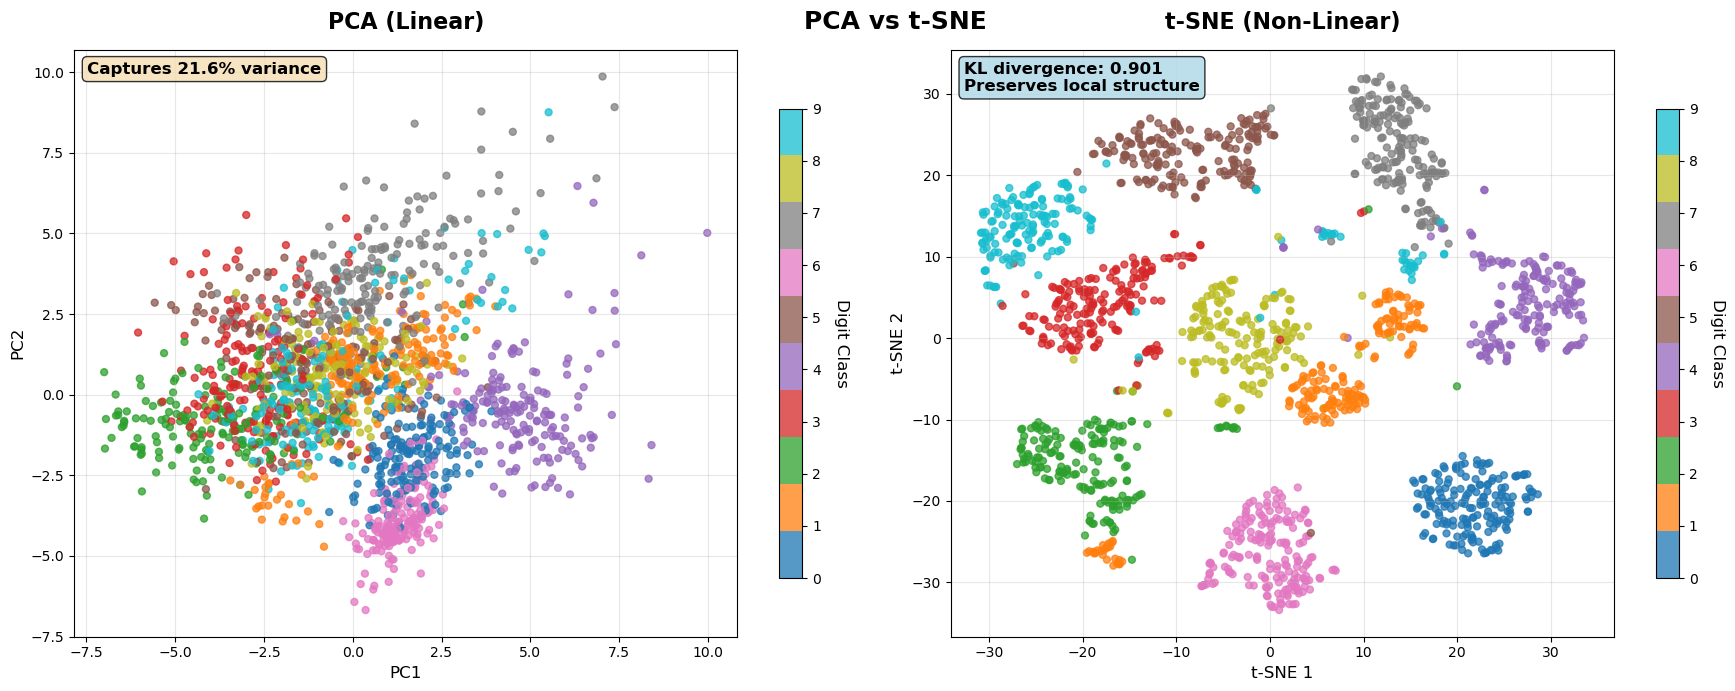

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# PCA Plot
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=25, alpha=0.75)
ax1.set_title('PCA (Linear)', fontsize=16, fontweight='bold', pad=15)
ax1.text(0.02, 0.98, 'Captures 21.6% variance', transform=ax1.transAxes, 
         fontsize=12, fontweight='semibold', verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='wheat', alpha=0.8))
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.grid(True, alpha=0.3)

# t-SNE Plot
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=25, alpha=0.75)
ax2.set_title('t-SNE (Non-Linear)', fontsize=16, fontweight='bold', pad=15)
ax2.text(0.02, 0.98, 'KL divergence: 0.901\nPreserves local structure', 
         transform=ax2.transAxes, fontsize=12, fontweight='semibold', 
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8))
ax2.set_xlabel('t-SNE 1', fontsize=12)
ax2.set_ylabel('t-SNE 2', fontsize=12)
ax2.grid(True, alpha=0.3)

# Individual colorbars
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.8, pad=0.05)
cbar1.set_label('Digit Class', fontsize=12, rotation=270, labelpad=20)
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.8, pad=0.05)
cbar2.set_label('Digit Class', fontsize=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.suptitle('PCA vs t-SNE', 
             fontsize=18, fontweight='bold', y=0.98)
plt.show()


## PCA Explained Variance Analysis

The cumulative variance curve shows PCA's compression power for the Digits dataset:

- **~20 components**: 90% variance (64→20 = **69% reduction**)
- **~40 components**: 95% variance (64→40 = **38% reduction**)  
- **Last 24 components**: <5% total variance (mostly noise, pixel correlations)

**Key insight:** 95% of digit structure lives in just 40 dimensions, not 64. The curve guides practical component selection for modeling.

**Practical rule:** Choose components until 90-95% cumulative variance for downstream tasks.
am tasks.
ations.


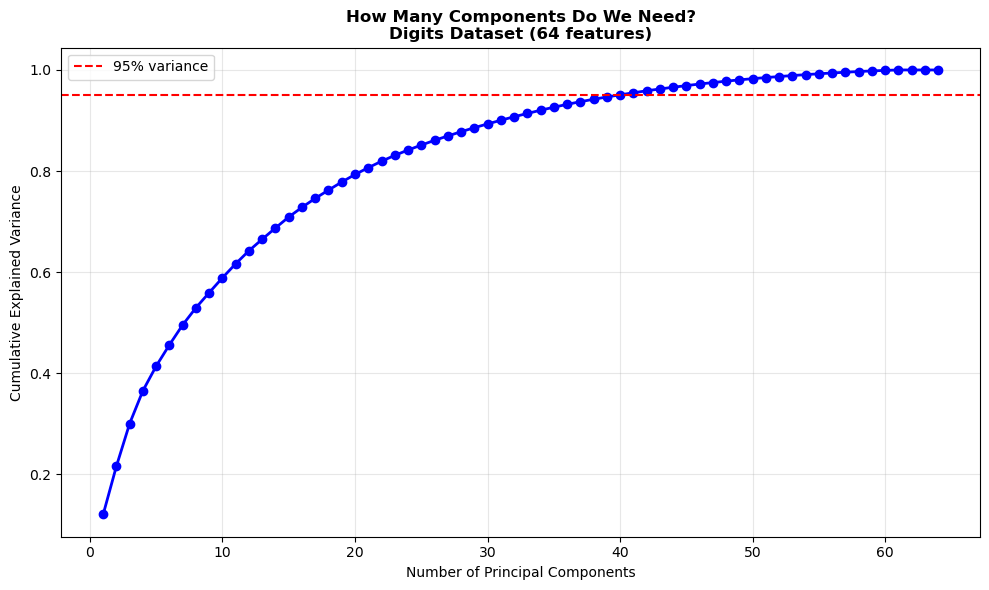

In [16]:
pca_full = PCA(random_state=42)
pca_full.fit(X_scaled)

plt.figure(figsize=(10, 6))
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, 65), cumsum_var, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How Many Components Do We Need?\nDigits Dataset (64 features)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

| Method | Strengths | Best Uses | Limitations |
|--------|-----------|-----------|-------------|
| **PCA** | Linear, fast, explained variance, modeling-ready | Preprocessing, compression, feature engineering | Misses non-linear structure |
| **t-SNE** | Beautiful clusters, local structure, exploration | Visualization, debugging embeddings | Visualization only, slow, stochastic |

**Production rule:** Scale → PCA(n_components=20-40) → model. Use t-SNE for exploratory analysis only.

**Always scale before PCA!**


## Test PCA's Real Value: Logistic Regression Performance

**Why test classification?** We've seen PCA compresses data (64→40 dimensions). Does this hurt model accuracy, or does it actually help?

**What we'll compare:**
- **Full data** (64 features): Baseline accuracy
- **PCA(40)**: Production compression (95% variance)
- **PCA(2)**: Visualization dimensions (21.6% variance)



> **Key question:** Can we compress data significantly without losing predictive power?



In [19]:
# COMPLETE DEMO: PCA + Logistic Regression on Digits Dataset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.style.use('default')
sns.set_palette("husl")

# Load data
digits = load_digits()
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)

print("Dataset: 1797 images, 64 features (8x8 pixels), 10 classes")
print()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 1. BASELINE: Full data (64 features)
print("1. Full data (64 features)")
lr_full = LogisticRegression(max_iter=1000, random_state=42)
lr_full.fit(X_train, y_train)
y_pred_full = lr_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
print(f"   Accuracy: {acc_full:.1%}")

# 2. PCA(40): Production compression
print("\n2. PCA(40 components)")
pca40 = PCA(n_components=40, random_state=42)
X_train_pca40 = pca40.fit_transform(X_train)
X_test_pca40 = pca40.transform(X_test)
print(f"   Explained variance: {sum(pca40.explained_variance_ratio_):.1%}")

lr_pca40 = LogisticRegression(max_iter=1000, random_state=42)
lr_pca40.fit(X_train_pca40, y_train)
y_pred_pca40 = lr_pca40.predict(X_test_pca40)
acc_pca40 = accuracy_score(y_test, y_pred_pca40)
print(f"   Accuracy: {acc_pca40:.1%}")
print(f"   Change: {acc_pca40 - acc_full:+.1%}")

# 3. PCA(2): Visualization dimensions
print("\n3. PCA(2 components)")
pca2 = PCA(n_components=2, random_state=42)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)
print(f"   Explained variance: {sum(pca2.explained_variance_ratio_):.1%}")

lr_pca2 = LogisticRegression(max_iter=1000, random_state=42)
lr_pca2.fit(X_train_pca2, y_train)
y_pred_pca2 = lr_pca2.predict(X_test_pca2)
acc_pca2 = accuracy_score(y_test, y_pred_pca2)
print(f"   Accuracy: {acc_pca2:.1%}")
print(f"   Change: {acc_pca2 - acc_full:+.1%}")

# Results table
print(f"{'Method':<20} {'Accuracy':<10} {'Compression':<12} {'Variance':<10}")
print("-"*60)
print(f"{'Full (64D)':<20} {acc_full*100:6.1f}% {'0%':<12} {'100%':<10}")
print(f"{'PCA(40D)':<20} {acc_pca40*100:6.1f}% {'38%':<12} {sum(pca40.explained_variance_ratio_)*100:6.1f}%")
print(f"{'PCA(2D)':<20} {acc_pca2*100:6.1f}% {'97%':<12} {sum(pca2.explained_variance_ratio_)*100:6.1f}%")


Dataset: 1797 images, 64 features (8x8 pixels), 10 classes

1. Full data (64 features)
   Accuracy: 97.2%

2. PCA(40 components)
   Explained variance: 95.1%
   Accuracy: 95.3%
   Change: -1.9%

3. PCA(2 components)
   Explained variance: 22.1%
   Accuracy: 52.5%
   Change: -44.7%
Method               Accuracy   Compression  Variance  
------------------------------------------------------------
Full (64D)             97.2% 0%           100%      
PCA(40D)               95.3% 38%            95.1%
PCA(2D)                52.5% 97%            22.1%


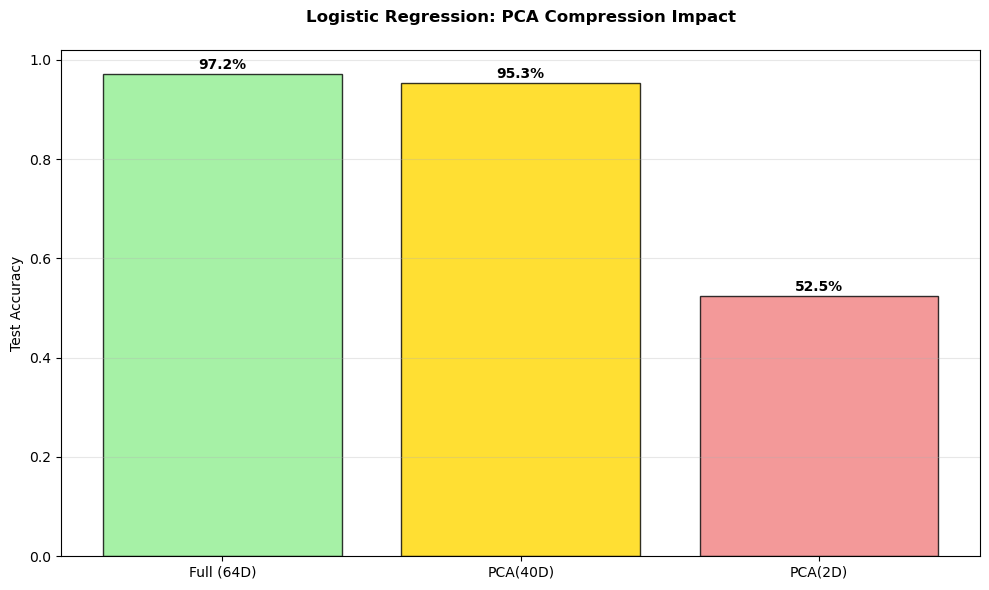

In [20]:
# Bar chart
methods = ['Full (64D)', 'PCA(40D)', 'PCA(2D)']
accuracies = [acc_full, acc_pca40, acc_pca2]
colors = ['lightgreen', 'gold', 'lightcoral']

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.ylim(0, 1.02)
plt.ylabel('Test Accuracy')
plt.title('Logistic Regression: PCA Compression Impact', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Summary

**PCA(40D) delivers 95.3% accuracy with 38% fewer features (95% variance retained) - only 1.9% drop from full data's 97.2%.** 

PCA(2D) confirms its visualization role at 52.5% accuracy (massive info loss). 

**Use PCA(30-50 components) for production: speed gains without meaningful accuracy sacrifice.**